In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import os
file_name = "ballscrew_s.xlsx"
absolute_path = os.path.abspath(file_name)
print(absolute_path)

C:\Users\Sanam\git\Thesis_ErrorDetection\ballscrew_s.xlsx


In [3]:
# Load your data from the Excel files
data_b = pd.read_excel('ballscrew_s.xlsx')
data_l = pd.read_excel('leadscrew_s.xlsx')

In [4]:
data_b.drop(data_b.columns[len(data_b.columns)-1], axis=1, inplace = True)

In [5]:
data_b.drop(data_b.columns[len(data_b.columns)-1], axis=1, inplace = True)

In [6]:
data_b.rename(columns={'error actual':'error'}, inplace=True)

In [7]:
data_b

,commanded position,theoretical position,actual position,error
0,0.000,0.000000,0.000,0.000
1,0.000,0.007324,0.000,0.000
2,0.000,0.002441,0.001,0.001
3,0.000,0.002441,0.009,0.009
4,0.000,0.006714,0.019,0.019
...,...,...,...,...
120493,-0.025,0.000000,-0.002,0.023
120494,-0.025,0.000000,-0.002,0.023
120495,-0.025,0.000000,-0.002,0.023
120496,-0.025,0.000000,-0.002,0.023


In [8]:
# Extract the features (X) and target (Y) for ballscrew
X_b = data_b.iloc[:, :-1].values  # Use all columns except the last one as features
Y_b = data_b.iloc[:, -1].values  # Use the last column as the target

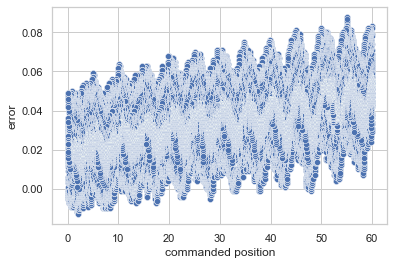

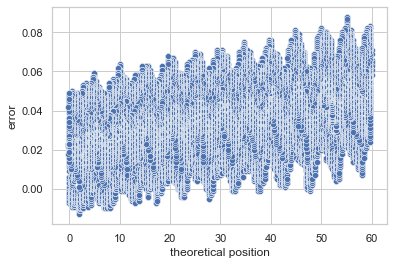

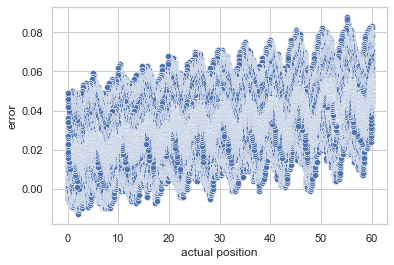

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_b['commanded position'], y=data_b['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_b['theoretical position'], y=data_b['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_b['actual position'], y=data_b['error'])
plt.show()


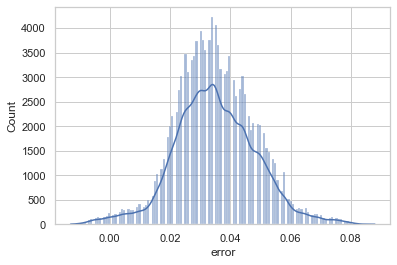

In [10]:
#Histogram
sns.histplot(data_b['error'], kde=True)
plt.show()

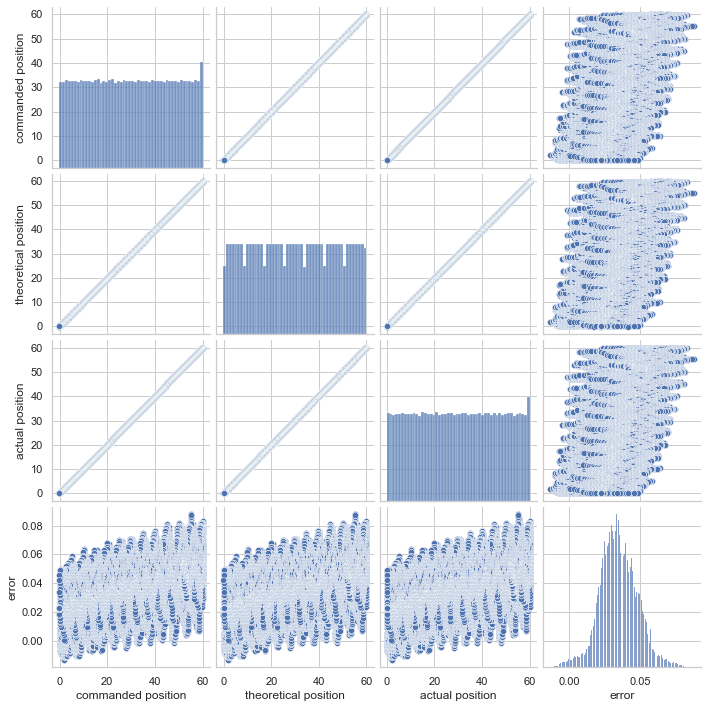

In [11]:
# Seaborn Pair Plot
sns.pairplot(data_b)
plt.show()

In [12]:
# Checking skewness
check_skew = (data_b.skew(axis=0, skipna=True, numeric_only=True))
print(check_skew)

commanded position     -0.000168
theoretical position   -0.000367
actual position        -0.000217
error                   0.082919
dtype: float64


In [13]:
# Standardization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fit = std_scaler.fit(data_b)
output = std_scaler.transform(data_b)
data_b = pd.DataFrame(output, columns=data_b.columns, index=list(data_b.index.values))

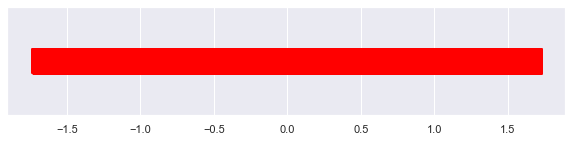

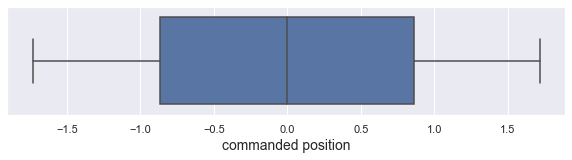

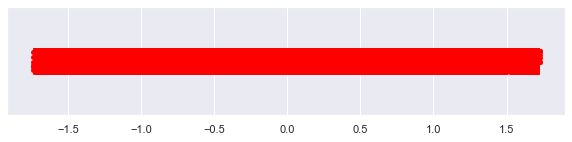

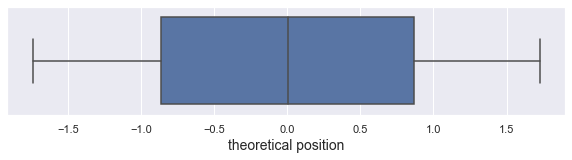

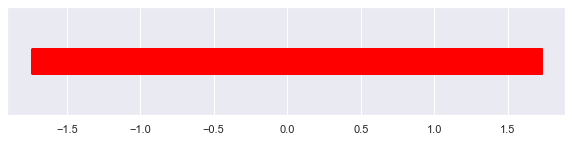

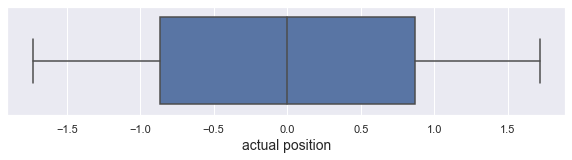

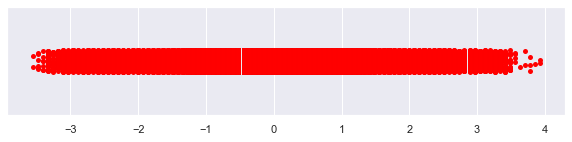

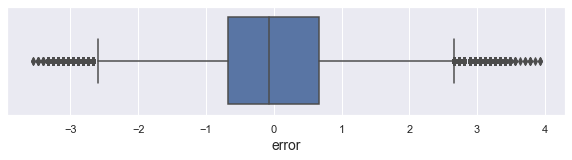

In [14]:
# Visuallization for outliers by using stripplot & boxplot (Seaborn)
for feature in data_b.columns:
    sns.set(rc={'figure.figsize':(10, 2), "axes.labelsize":14})
    fig = sns.stripplot(data=data_b, x=feature, color='red')
    fig.set(xlabel='')
    plt.show()
    fig = sns.boxplot(data=data_b, x=feature)
    plt.show()
    print('\n')

In [15]:
# Detecting outliers
def detect_outlier(data_b):
    Q1, Q3 = np.percentile(data_b, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    outlier = data_b[((data_b<lower_bound) | (data_b>upper_bound))]
    return outlier

for feature in data_b.columns:
    outlier = detect_outlier(data_b[feature])
    print('Name of column: '+ feature)
    print('Number of outliers: '+ str(len(outlier)))
    print('Max outlier value: '+ str(outlier.max()))
    print('Min outlier value: '+ str(outlier.min()))
    print('\n')

Name of column: commanded position
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan


Name of column: theoretical position
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan


Name of column: actual position
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan


Name of column: error
Number of outliers: 2141
Max outlier value: 3.926151075296396
Min outlier value: -3.5597213635509446




In [16]:
# Treating outliers
for i in data_b.columns:
    outlier = detect_outlier(data_b[i])   
    data_b.loc[list(outlier.keys()), i] = data_b[i].mean()

In [17]:
# Checking outliers
for feature in data_b.columns:
    outlier = detect_outlier(data_b[feature])
    print('Name of column: '+ feature)
    print('Number of outliers: '+ str(len(outlier)))
    print('Max outlier value: '+ str(outlier.max()))
    print('Min outlier value: '+ str(outlier.min()))
    print('\n')

Name of column: commanded position
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan


Name of column: theoretical position
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan


Name of column: actual position
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan


Name of column: error
Number of outliers: 1276
Max outlier value: 2.6661527440045205
Min outlier value: -2.5961932278582647




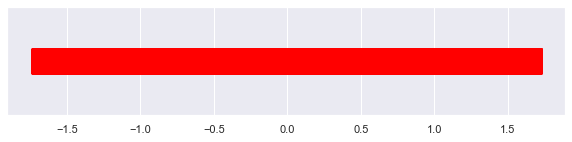

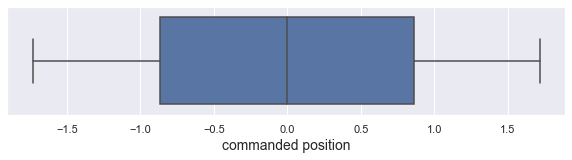

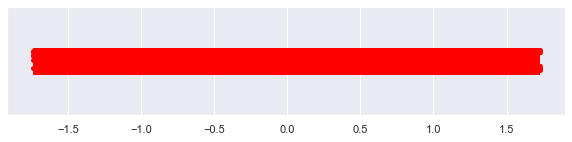

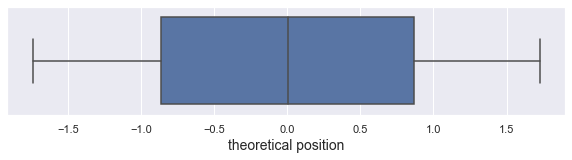

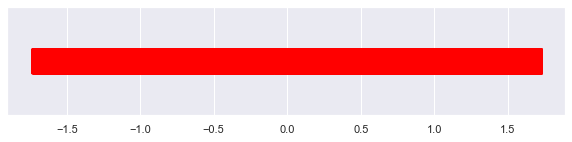

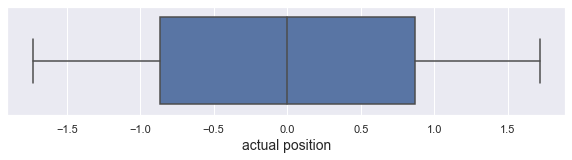

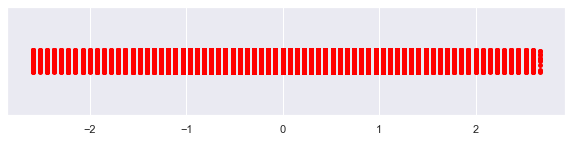

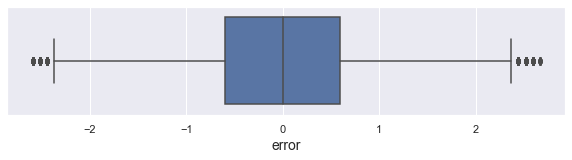

In [18]:
# Visuallization by using stripplot & boxplot (Seaborn)
for feature in data_b.columns:
    sns.set(rc={'figure.figsize':(10, 2), "axes.labelsize":14})
    fig = sns.stripplot(data=data_b, x=feature, color='red')
    fig.set(xlabel='')
    plt.show()
    fig = sns.boxplot(data=data_b, x=feature)
    plt.show()
    print('\n')

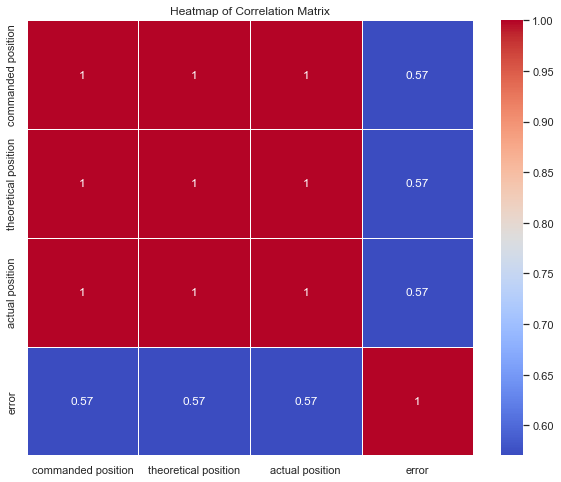

In [19]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_b.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [20]:
# Filtering features which are less related to the target with correlation check
corr_variable = 0.4
corrwith_target = data_b.corrwith(data_b['error'])
features_to_drop = (corrwith_target[(corrwith_target<corr_variable)&(corrwith_target>-(corr_variable))]).index.values.tolist()
data_b.drop(features_to_drop, axis=1, inplace=True)
print('Number of the features:', len(data_b.columns))

Number of the features: 4


In [22]:
# Normalize the data
scaler_X_b = MinMaxScaler()
scaler_Y_b = MinMaxScaler()
X_b = scaler_X_b.fit_transform(X_b)
Y_b = scaler_Y_b.fit_transform(Y_b.reshape(-1, 1))

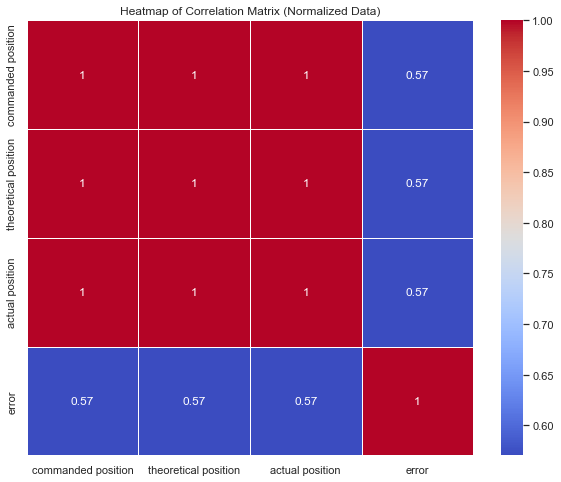

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_b_normalized = pd.DataFrame(scaler.fit_transform(data_b.iloc[:, :-1]), columns=data_b.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_b_normalized['error'] = data_b['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_b_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()


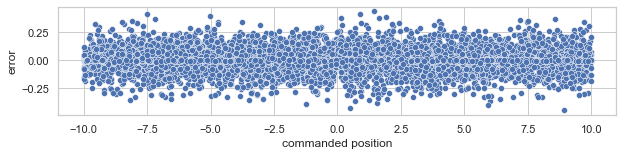

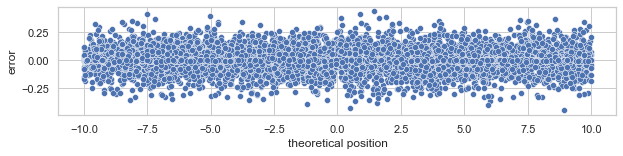

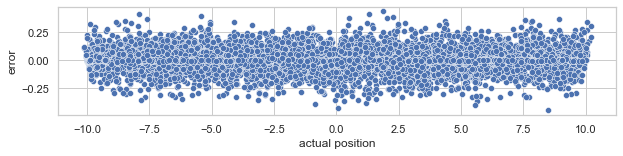

In [24]:
# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_l['commanded position'], y=data_l['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_l['theoretical position'], y=data_l['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_l['actual position'], y=data_l['error'])
plt.show()


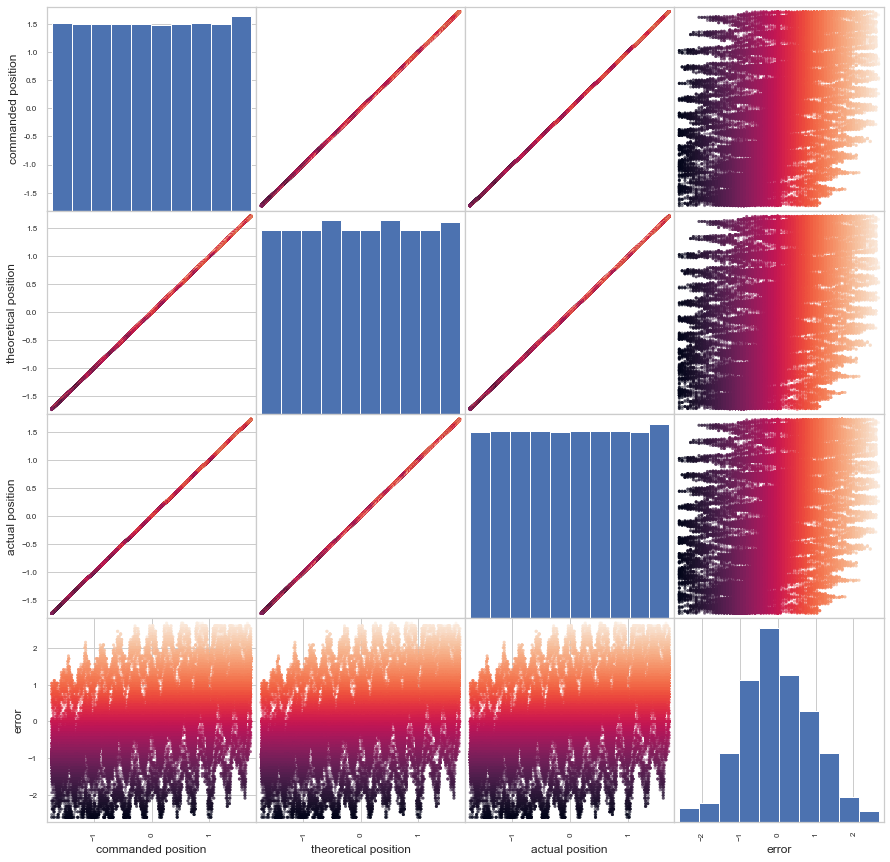

In [30]:
from pandas.plotting import scatter_matrix
# Visuallization by using stripplot & boxplot (Seaborn)
scatter_matrix(data_b,
               c = data_b['error'],
               alpha=0.5, 
               figsize=(15, 15), 
               diagonal='hist')
plt.show()

In [31]:
# Split data into training and testing sets
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_b, Y_b, test_size=0.2, random_state=42)

In [32]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [33]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
# Train the model
model.fit(X_train_b, Y_train_b, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
3013/3013 [==============================] - 12s 3ms/step - loss: 0.0133
Epoch 2/30
3013/3013 [==============================] - 10s 3ms/step - loss: 0.0118
Epoch 3/30
3013/3013 [==============================] - 10s 3ms/step - loss: 0.0118
Epoch 4/30
3013/3013 [==============================] - 10s 3ms/step - loss: 0.0118
Epoch 5/30
3013/3013 [==============================] - 10s 3ms/step - loss: 0.0118
Epoch 6/30
3013/3013 [==============================] - 10s 3ms/step - loss: 0.0117
Epoch 7/30
3013/3013 [==============================] - 10s 3ms/step - loss: 0.0117
Epoch 8/30
3013/3013 [==============================] - 10s 3ms/step - loss: 0.0117
Epoch 9/30
3013/3013 [==============================] - 10s 3ms/step - loss: 0.0117
Epoch 10/30
3013/3013 [==============================] - 10s 3ms/step - loss: 0.0117
Epoch 11/30
3013/3013 [==============================] - 11s 4ms/step - loss: 0.0117
Epoch 12/30
3013/3013 [==============================] - 10s 3ms/step - lo

In [35]:
# Evaluate the model
MSE_train_b = np.mean(np.square(model.predict(X_train_b) - Y_train_b))
MSE_test_b = np.mean(np.square(model.predict(X_test_b) - Y_test_b))
print('MSE on training data:', MSE_train_b)
print('MSE on testing data:', MSE_test_b)

754/754 [==============================] - 2s 3ms/step
MSE on training data: 0.011699983654338608
MSE on testing data: 0.0116202116383434


In [ ]:
data_l

In [19]:
# Extract the features (X) and target (Y)
X_l = data_l.iloc[:, :-1].values
Y_l = data_l.iloc[:, -1].values

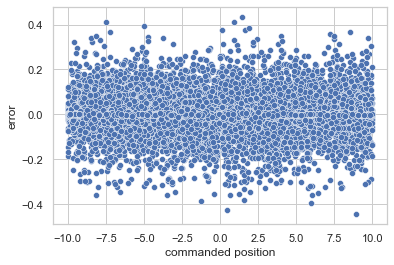

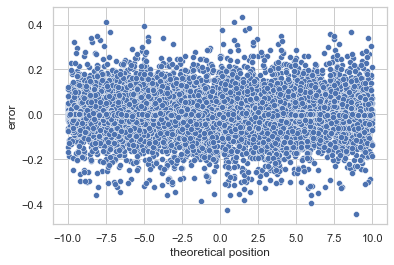

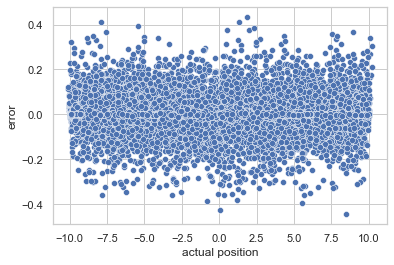

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_l['commanded position'], y=data_l['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_l['theoretical position'], y=data_l['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_l['actual position'], y=data_l['error'])
plt.show()


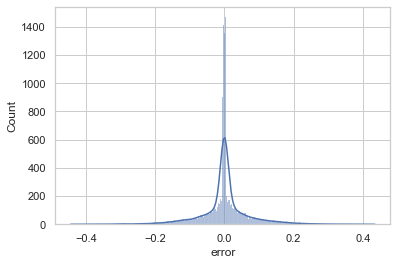

In [21]:
#Histogram
sns.histplot(data_l['error'], kde=True)
plt.show()

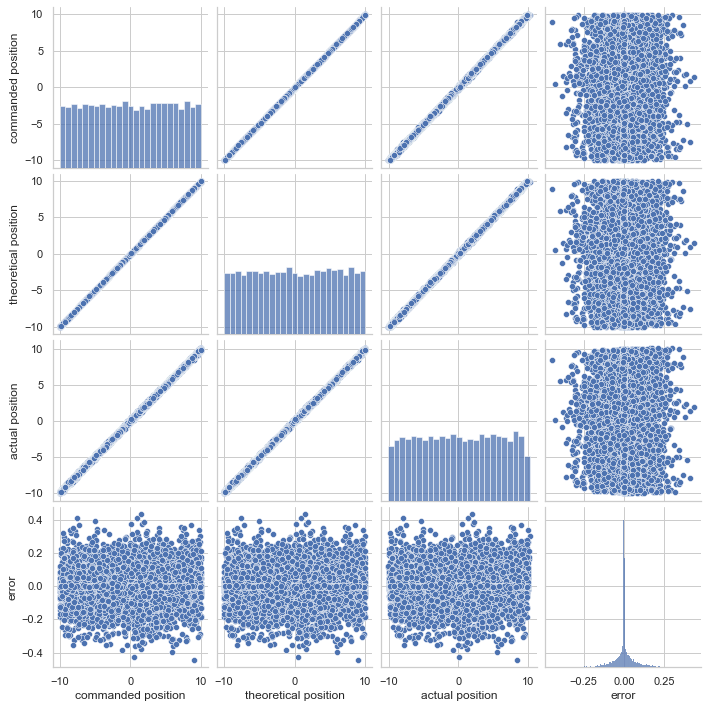

In [22]:
# Seaborn Pair Plot
sns.pairplot(data_l)
plt.show()

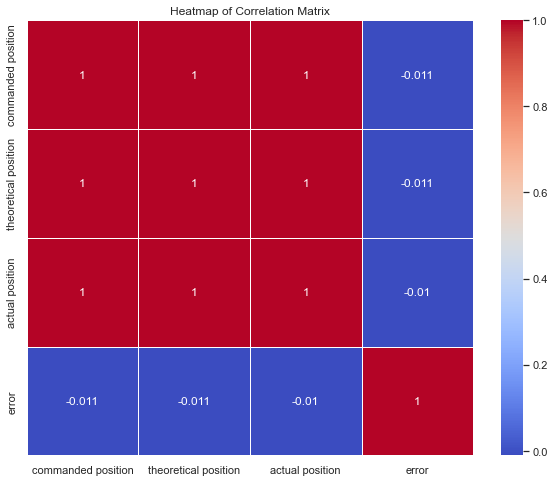

In [23]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_l.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [24]:
# Normalize the data
scaler_X_l = MinMaxScaler()
scaler_Y_l = MinMaxScaler()
X_l = scaler_X_l.fit_transform(X_l)
Y_l = scaler_Y_l.fit_transform(Y_l.reshape(-1, 1))

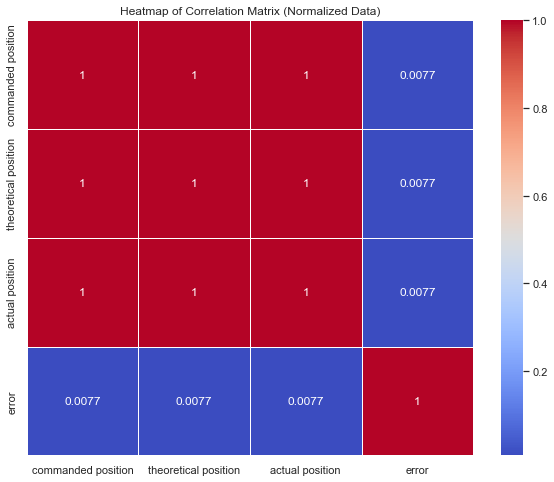

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_b_normalized = pd.DataFrame(scaler.fit_transform(data_b.iloc[:, :-1]), columns=data_b.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_b_normalized['error'] = data_b['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_b_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()


In [ ]:
# Scatter Plot for each feature against the target on normalized data
for feature in features:
    sns.scatterplot(data=data_b_normalized, x=feature, y=target)
    plt.title(f'Scatter Plot of {feature} vs {target} (Normalized Data)')
    plt.show()

# Pair Plot on normalized data
sns.pairplot(data_b_normalized)
plt.show()

In [26]:
# Split data into training and testing sets
X_train_l, X_test_l, Y_train_l, Y_test_l = train_test_split(X_l, Y_l, test_size=0.2, random_state=42)

In [27]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_l.shape[1], activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [ ]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_l.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [28]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
# Train the model
model.fit(X_train_l, Y_train_l, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 11/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 12/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 13/100


In [30]:
# Evaluate the model
MSE_train_l = np.mean(np.square(model.predict(X_train_l) - Y_train_l))
MSE_test_l = np.mean(np.square(model.predict(X_test_l) - Y_test_l))
print('MSE on training data:', MSE_train_l)
print('MSE on testing data:', MSE_test_l)

94/94 [==============================] - 0s 1ms/step
MSE on training data: 0.00017921019807527432
MSE on testing data: 0.00016127370395259326
